   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour  
0      1400     5      15  2013-01-01 05:00:00  
1      1416 

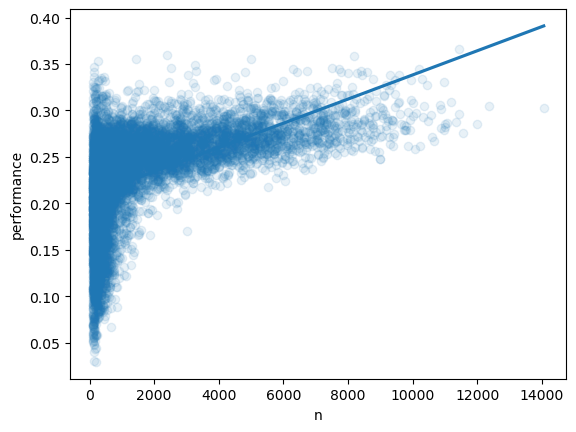

,playerID,performance,n
13058,munnisc01,1.0,1
791,banisje01,1.0,1
10696,lindsch02,1.0,1
6972,gowella01,1.0,1
5188,eddydo01,1.0,1
...,...,...,...
20438,zimmeky01,NaN,0
20441,zinkch01,NaN,0
20446,zinsebi01,NaN,0
20461,zumayjo01,NaN,0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the flights dataset is already loaded in a DataFrame named 'flights'
# For example: flights = pd.read_csv('path_to_file.csv')

flights = pd.read_csv('flights.csv')

print(flights.head())

flights[flights["dest"] == "IAH"].groupby(["year", "month", "day"]).agg({"arr_delay": lambda x: np.mean(x.dropna())})

flights[flights["dep_delay"] > 120]

flights[(flights["month"] == 1) & (flights["day"] == 1)]
flights[flights["month"].isin([1, 2])]

jan1 = flights[(flights["month"] == 1) & (flights["day"] == 1)]
flights[flights["month"] == 1]

flights.sort_values(by=["year", "month", "day", "dep_time"])
flights.sort_values(by="dep_delay", ascending=False)
flights.drop_duplicates()
flights[["origin", "dest"]].drop_duplicates()

# Assuming we want to keep all columns for the first occurrence of each (origin, dest) pair
flights.drop_duplicates(subset=["origin", "dest"], keep='first')

flights.groupby(["origin", "dest"]).size().sort_values(ascending=False)

flights.assign(
    gain=flights["dep_delay"] - flights["arr_delay"],
    speed=flights["distance"] / flights["air_time"] * 60
)

# For the .before and .after operations, we need to reorder the columns manually

# The rest of the operations follow the same general pattern: filtering, grouping, mutating, and summarizing.

# For the 'mtcars' dataset operations, we'd need a similar DataFrame loaded.

# For operations involving ggplot in R, we can use seaborn or matplotlib in Python.
# For example, for the scatter plot with a regression line:

batting = pd.read_csv('Batting.csv')

# Group by playerID and calculate performance and n
batters = batting.groupby('playerID').agg({
    'H': 'sum',
    'AB': 'sum'
}).reset_index()
batters['performance'] = batters['H'] / batters['AB']
batters = batters[['playerID', 'performance', 'AB']]
batters.columns = ['playerID', 'performance', 'n']

print(batters)

batters_filtered = batters[batters["n"] > 100]
sns.regplot(x="n", y="performance", data=batters_filtered, scatter_kws={"alpha": 1/10}, fit_reg=True, ci=None)
plt.show()

batters.sort_values(by="performance", ascending=False)